# In the following is the influence of the mesh refinement examined and its affects to the convergence and the wall shear stress

#### The simulation was run with two meshes of different refinement levels. They will be refered to as 1 to 5. 1 being the least and 5 the most refined.


In [1]:
# number of tested meshes 
num_meshes = 5
num_iterations = 6000


### Direct comparison of the residuals of each field variable

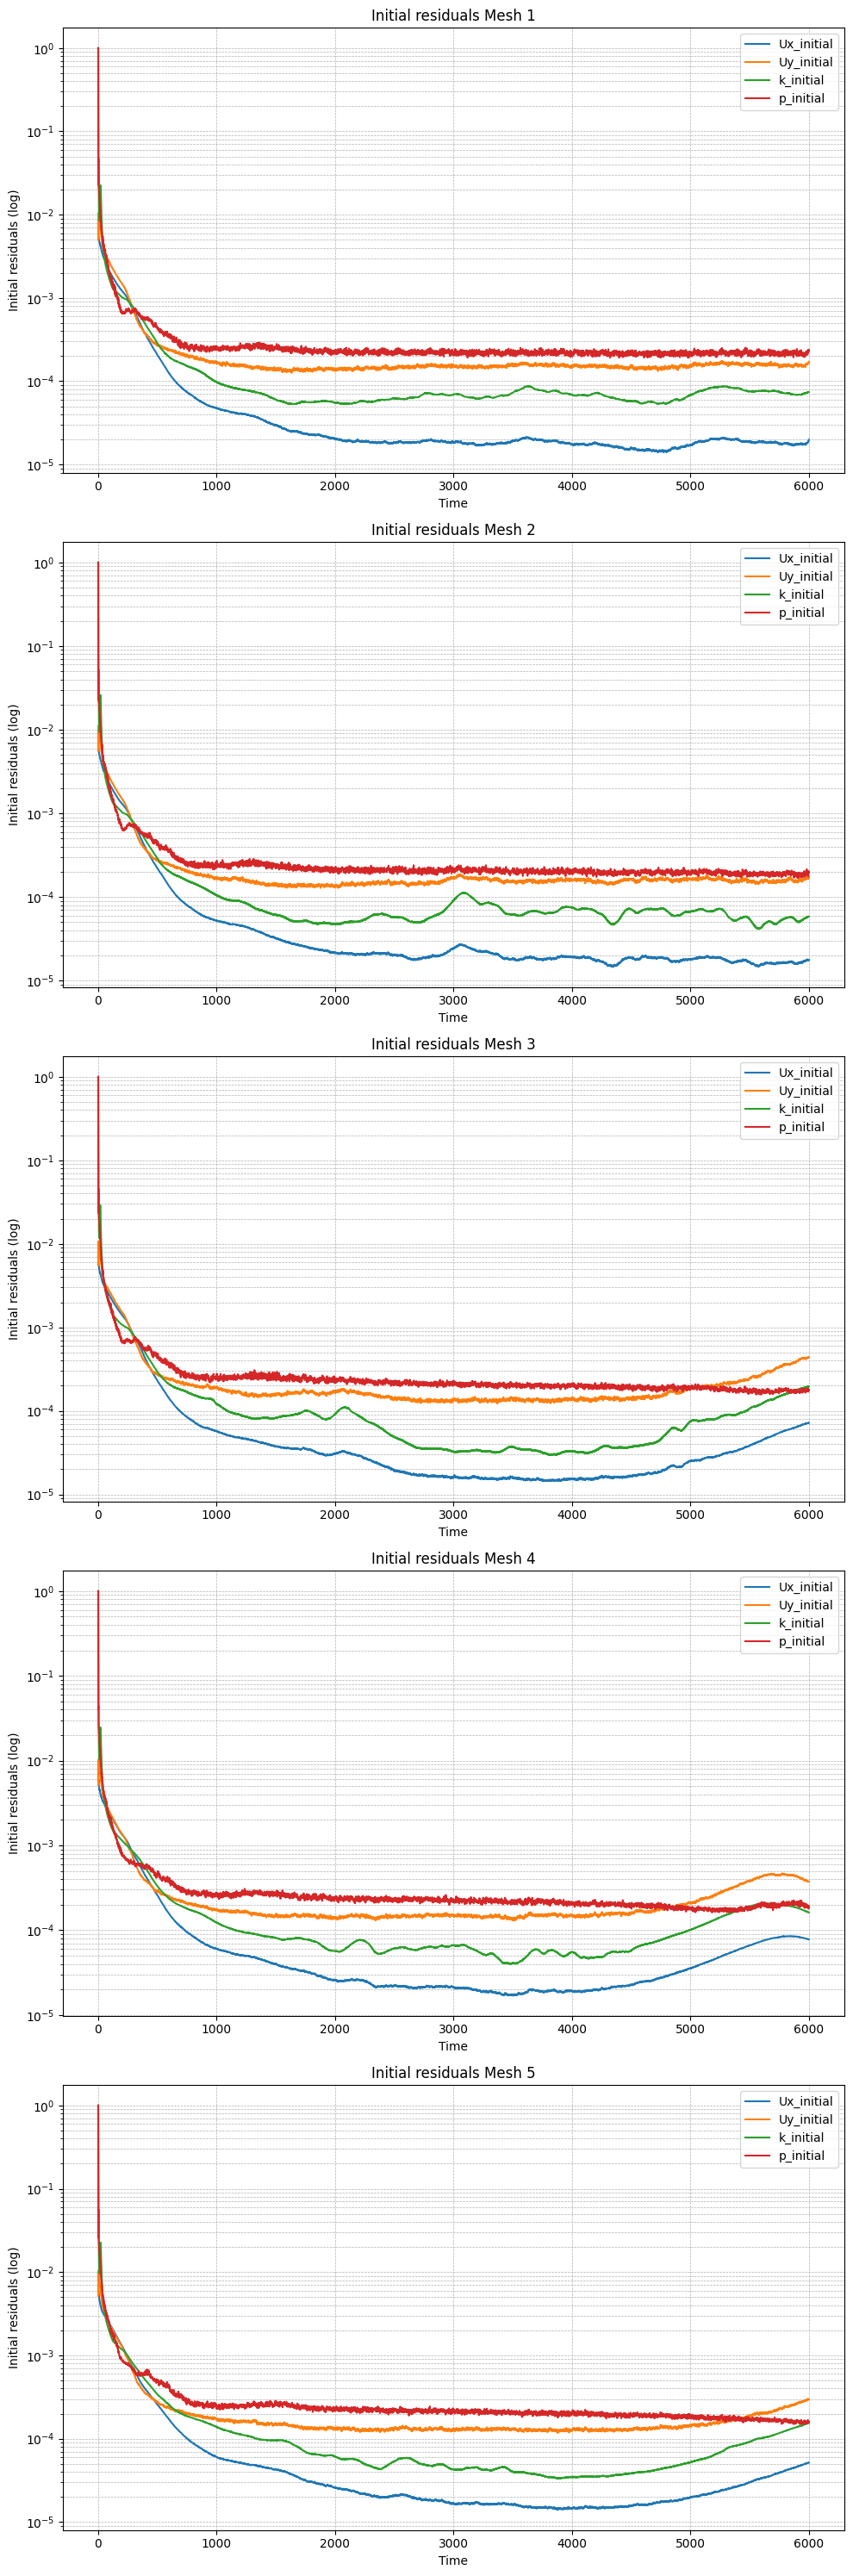

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# column names 
colnames = [
    "Time", "U_solver", "Ux_initial", "Ux_final", "Ux_iters",
    "Uy_initial", "Uy_final", "Uy_iters", "U_converged",
    "k_solver", "k_initial", "k_final", "k_iters", "k_converged",
    "p_solver", "p_initial", "p_final", "p_iters", "p_converged"
]


# plotting 
plt.figure(figsize=(10, 6 * num_meshes))

# for all meshes 
for i in range(1, num_meshes + 1):
    # Pfad zur Datei
    filepath = f'output/MeshConvergence/mesh_{i}/postProcessing/solverInfo/0/solverInfo.dat'
    
    # reading data
    df = pd.read_csv(filepath, sep=r'\s+', skiprows=2, names=colnames)
    
    # subplots
    plt.subplot(num_meshes, 1, i)
    plt.plot(df["Time"], df["Ux_initial"], label="Ux_initial")
    plt.plot(df["Time"], df["Uy_initial"], label="Uy_initial")
    plt.plot(df["Time"], df["k_initial"], label="k_initial")
    plt.plot(df["Time"], df["p_initial"], label="p_initial")
    
    plt.xlabel("Time")
    plt.ylabel("Initial residuals (log)")
    plt.title(f"Initial residuals Mesh {i}")
    plt.yscale('log')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()

# showing layout
plt.tight_layout()
plt.show()

### Comparison of the residuals of each mesh plotted over time

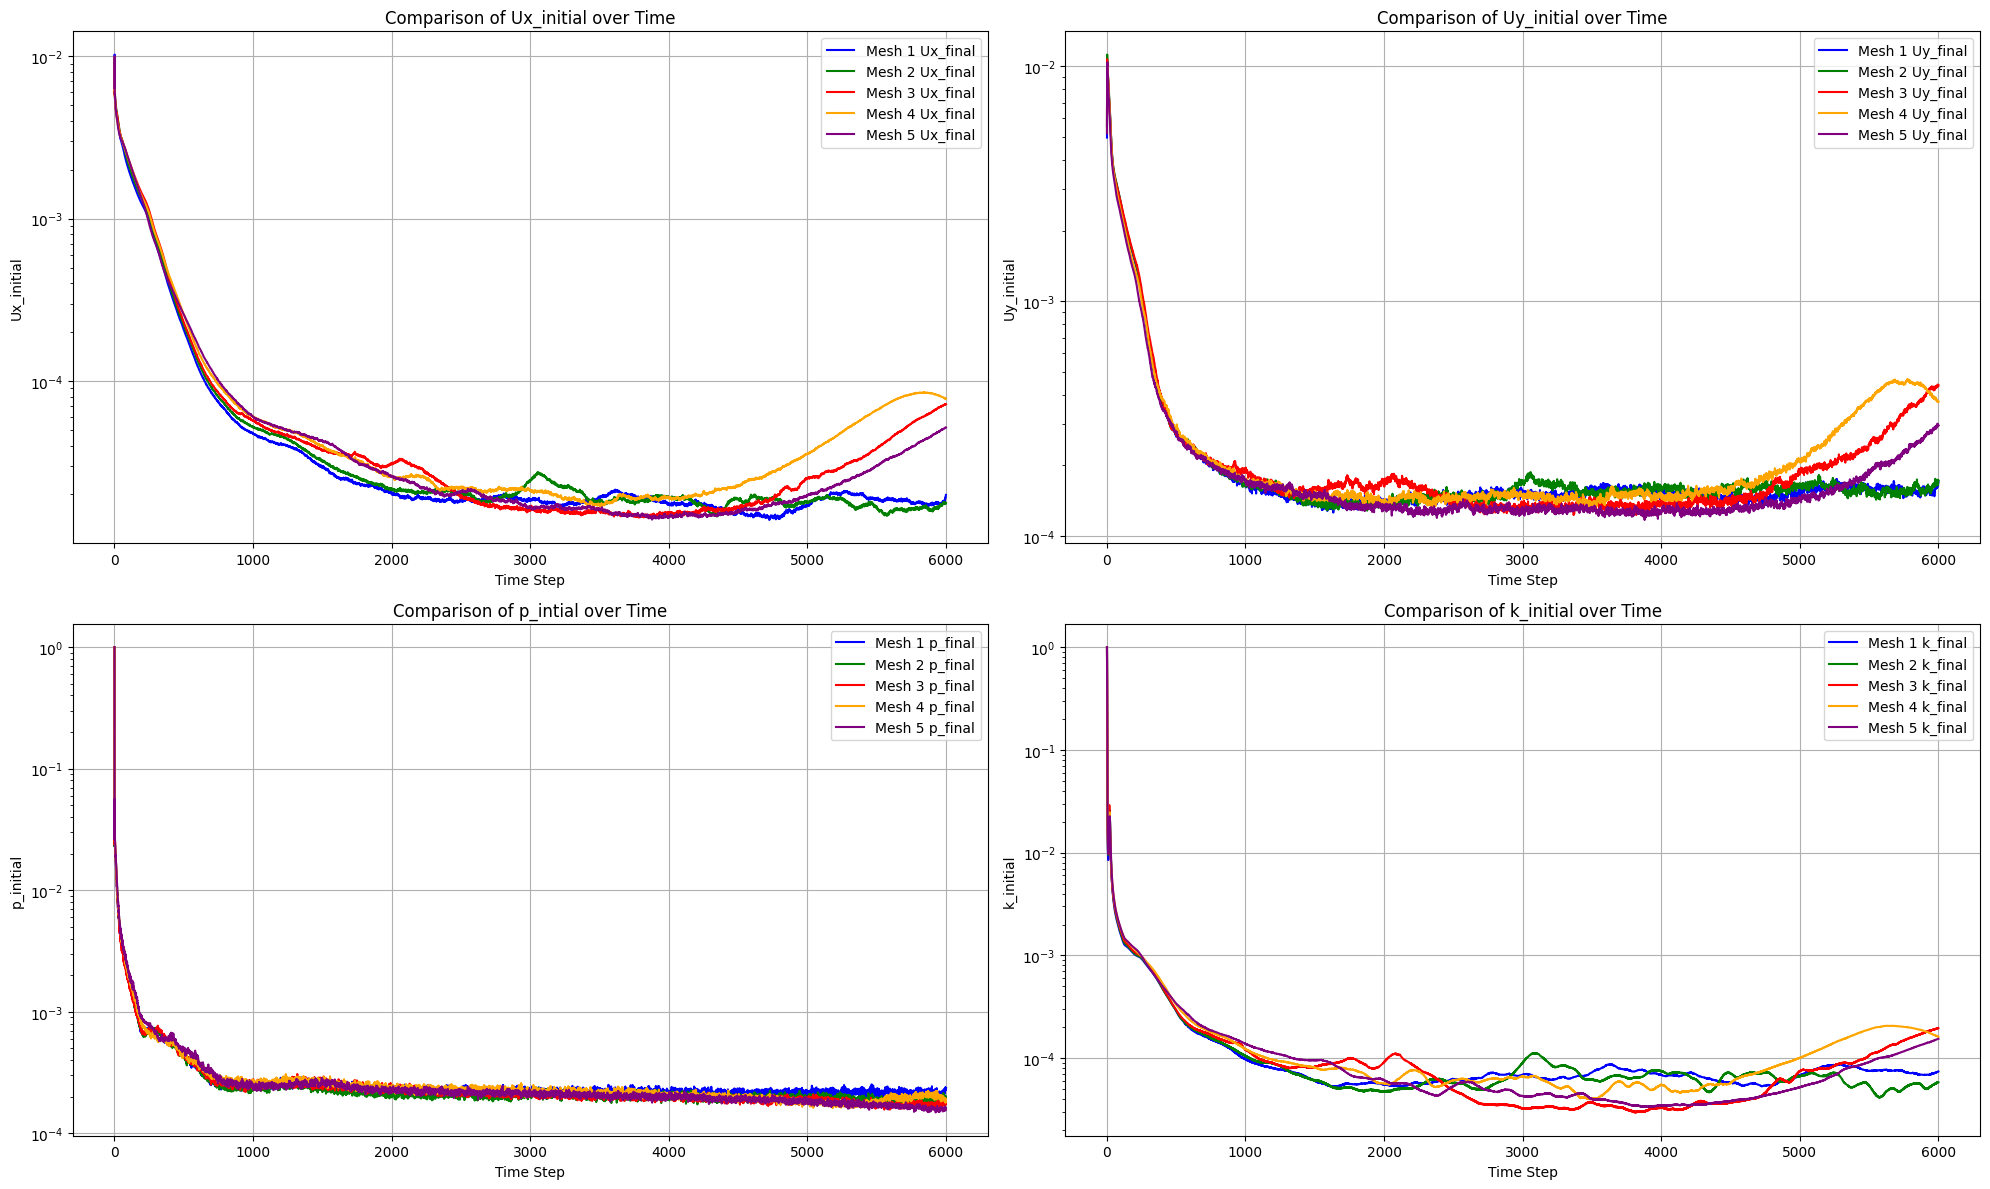

In [3]:
# colors for each mesh 
colors = ['blue', 'green', 'red', 'orange', 'purple']

# reading data
dfs = []
for i in range(1, num_meshes + 1):
    path = f'output/MeshConvergence/mesh_{i}/postProcessing/solverInfo/0/solverInfo.dat'
    df = pd.read_csv(path, sep=r'\s+', skiprows=2, names=colnames)
    dfs.append(df)

# plotting
plt.figure(figsize=(20, 12))

# Ux_final
plt.subplot(2, 2, 1)
for i, df in enumerate(dfs):
    plt.plot(df["Time"], df["Ux_initial"], label=f"Mesh {i+1} Ux_final", color=colors[i])
plt.xlabel('Time Step')
plt.ylabel('Ux_initial')
plt.title('Comparison of Ux_initial over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Uy_final
plt.subplot(2, 2, 2)
for i, df in enumerate(dfs):
    plt.plot(df["Time"], df["Uy_initial"], label=f"Mesh {i+1} Uy_final", color=colors[i])
plt.xlabel('Time Step')
plt.ylabel('Uy_initial')
plt.title('Comparison of Uy_initial over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)

# p_final
plt.subplot(2, 2, 3)
for i, df in enumerate(dfs):
    plt.plot(df["Time"], df["p_initial"], label=f"Mesh {i+1} p_final", color=colors[i])
plt.xlabel('Time Step')
plt.ylabel('p_initial')
plt.title('Comparison of p_intial over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)

# k_final
plt.subplot(2, 2, 4)
for i, df in enumerate(dfs):
    plt.plot(df["Time"], df["k_initial"], label=f"Mesh {i+1} k_final", color=colors[i])
plt.xlabel('Time Step')
plt.ylabel('k_initial')
plt.title('Comparison of k_initial over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)

# showing layout
plt.tight_layout()
plt.show()


## Comparison of the wall shear stresses

### comparison with the experimental data 

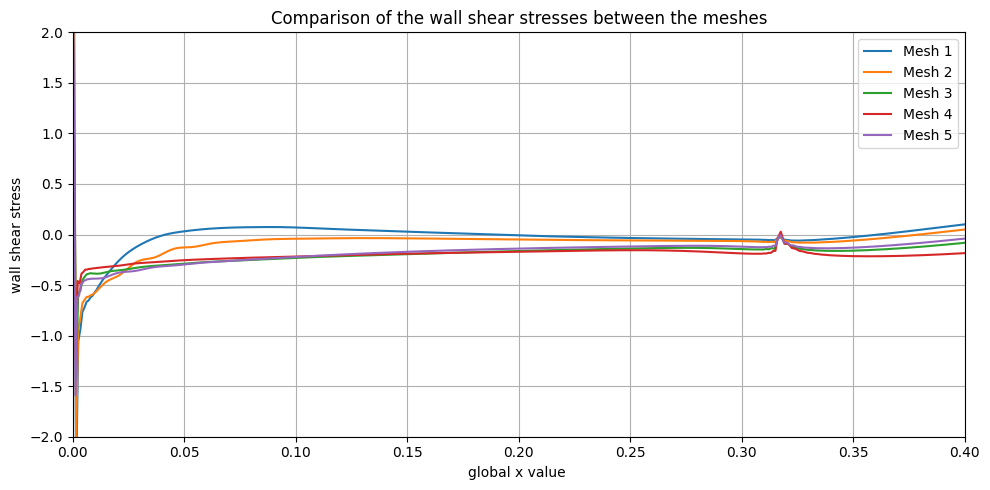

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def process_file(file_path):
    data_pairs = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) >= 9:
                x = float(parts[0])

                area = np.array([
                    float(parts[6]),
                    float(parts[7]),
                    float(parts[8])
                ])
                norm = np.linalg.norm(area)
                area_normalized = area / norm if norm != 0 else area

                ez = np.array([0, 0, 1])
                cross_prod = np.cross(area_normalized, ez)

                shear = np.array([
                    float(parts[3]),
                    float(parts[4]),
                    float(parts[5])
                ])

                scalar_product = np.dot(shear, cross_prod)
                data_pairs.append((x, scalar_product))

    return sorted(data_pairs, key=lambda pair: pair[0])

def plot_multiple_files_with_loop():
    plt.figure(figsize=(10, 5))

    for mesh_num in range(1, 6):  # Mesh 1 bis 5
        # Pfad manuell zusammensetzen
        file_path = (
            "output/MeshConvergence/mesh_"
            + str(mesh_num)
            + "/postProcessing/samples/" + str(num_iterations) + "/wallShearStress_lowerWall.raw"
        )

        data_pairs = process_file(file_path)
        x_vals = [pair[0] for pair in data_pairs]
        scalar_vals = [pair[1] for pair in data_pairs]

        plt.plot(x_vals, scalar_vals, label=f'Mesh {mesh_num}')

    plt.title('Comparison of the wall shear stresses between the meshes')
    plt.xlabel('global x value ')
    plt.ylabel('wall shear stress')
    plt.xlim(0, 0.4)
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# execution
plot_multiple_files_with_loop()


### table of the wall shear stress at certain points in the global coordinate system 

In [5]:
import numpy as np
import pandas as pd

def process_file(file_path):
    data_pairs = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) >= 9:
                x = float(parts[0])

                area = np.array([
                    float(parts[6]),
                    float(parts[7]),
                    float(parts[8])
                ])
                norm = np.linalg.norm(area)
                area_normalized = area / norm if norm != 0 else area

                ez = np.array([0, 0, 1])
                cross_prod = np.cross(area_normalized, ez)

                shear = np.array([
                    float(parts[3]),
                    float(parts[4]),
                    float(parts[5])
                ])

                scalar_product = np.dot(shear, cross_prod)
                data_pairs.append((x, scalar_product))

    return sorted(data_pairs, key=lambda pair: pair[0])

def interpolate_values_at_points(mesh_range, x_targets):
    results = {'x': x_targets}

    for mesh_num in mesh_range:
        # Datei-Pfad erzeugen
        file_path = (
            "output/MeshConvergence/mesh_"
            + str(mesh_num)
            + "/postProcessing/samples/" + str(num_iterations) + "/wallShearStress_lowerWall.raw"
        )

        # Daten laden
        data_pairs = process_file(file_path)
        x_vals = np.array([pair[0] for pair in data_pairs])
        scalar_vals = np.array([pair[1] for pair in data_pairs])

        # Lineare Interpolation an gewünschten Stellen
        interpolated = np.interp(x_targets, x_vals, scalar_vals)

        # In Ergebnis-Tabelle einfügen
        results[f'Mesh {mesh_num}'] = interpolated

    # Als DataFrame für schöne Ausgabe
    df = pd.DataFrame(results)
    return df

# Werte, an denen interpoliert werden soll
x_targets = np.array([0.082, 0.122, 0.162, 0.202, 0.242, 0.282, 0.386])
mesh_range = range(1, 6)  # Mesh 1 bis 5

# Interpolation ausführen und anzeigen
interpolation_table = interpolate_values_at_points(mesh_range, x_targets)
print(interpolation_table.to_string(index=False))


    x    Mesh 1    Mesh 2    Mesh 3    Mesh 4    Mesh 5
0.082  0.073283 -0.054087 -0.250558 -0.227944 -0.244853
0.122  0.049977 -0.036230 -0.213016 -0.203968 -0.196237
0.162  0.019172 -0.040173 -0.186176 -0.184406 -0.161650
0.202 -0.010087 -0.049764 -0.161521 -0.169442 -0.137853
0.242 -0.031176 -0.057376 -0.141782 -0.156061 -0.121123
0.282 -0.043546 -0.061358 -0.132602 -0.168764 -0.111172
0.386  0.062931  0.015036 -0.110508 -0.199779 -0.071333


### table of the wall shear stress at certain points in the coordinate system of the ramp

something with the x values not right 

In [6]:
import numpy as np
import pandas as pd

def process_file(file_path):
    data_pairs = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) >= 9:
                x = float(parts[0])

                area = np.array([
                    float(parts[6]),
                    float(parts[7]),
                    float(parts[8])
                ])
                norm = np.linalg.norm(area)
                area_normalized = area / norm if norm != 0 else area

                ez = np.array([0, 0, 1])
                cross_prod = np.cross(area_normalized, ez)

                shear = np.array([
                    float(parts[3]),
                    float(parts[4]),
                    float(parts[5])
                ])

                scalar_product = np.dot(shear, cross_prod)
                data_pairs.append((x, scalar_product))

    return sorted(data_pairs, key=lambda pair: pair[0])

def interpolate_values_at_points(mesh_range, x_targets):
    results = {'x': x_targets}

    for mesh_num in mesh_range:
        # Datei-Pfad erzeugen
        file_path = (
            "output/MeshConvergence/mesh_"
            + str(mesh_num)
            + "/postProcessing/samples/" + str(num_iterations) + "/wallShearStress_lowerWall.raw"
        )

        # Daten laden
        data_pairs = process_file(file_path)
        x_vals = np.array([pair[0] for pair in data_pairs])
        scalar_vals = np.array([pair[1] for pair in data_pairs])

        # Lineare Interpolation an gewünschten Stellen
        interpolated = np.interp(x_targets, x_vals, scalar_vals)

        # In Ergebnis-Tabelle einfügen
        results[f'Mesh {mesh_num}'] = interpolated

    # Als DataFrame für schöne Ausgabe
    df = pd.DataFrame(results)
    return df

# Ursprüngliche x-Werte
original_x = np.array([np.cos(np.radians(20))*0.082, np.cos(np.radians(20))*0.122, np.cos(np.radians(20))*0.162, np.cos(np.radians(20))*0.202, np.cos(np.radians(20))*0.242, np.cos(np.radians(20))*0.282, 0.386])

mesh_range = range(1, 6)  # Mesh 1 bis 5

# Interpolation ausführen und anzeigen
interpolation_table = interpolate_values_at_points(mesh_range, x_targets)
print(interpolation_table.to_string(index=False))


    x    Mesh 1    Mesh 2    Mesh 3    Mesh 4    Mesh 5
0.082  0.073283 -0.054087 -0.250558 -0.227944 -0.244853
0.122  0.049977 -0.036230 -0.213016 -0.203968 -0.196237
0.162  0.019172 -0.040173 -0.186176 -0.184406 -0.161650
0.202 -0.010087 -0.049764 -0.161521 -0.169442 -0.137853
0.242 -0.031176 -0.057376 -0.141782 -0.156061 -0.121123
0.282 -0.043546 -0.061358 -0.132602 -0.168764 -0.111172
0.386  0.062931  0.015036 -0.110508 -0.199779 -0.071333
